<a href="https://colab.research.google.com/github/pritam123-jain/Final-year/blob/master/recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
url = 'https://raw.githubusercontent.com/pritam123-jain/Final-year/master/movie_dataset.csv' #fetching dataset from github
df = pd.read_csv(url) #Reading the file

In [ ]:
df.head(1) #displaying Head

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron


In [ ]:
df.shape  #listing no of row and coloumn

(4803, 24)

In [ ]:
lst = [x.upper() for x in df.original_title] #Creating list of all the title in upper case
print(lst)

['AVATAR', "PIRATES OF THE CARIBBEAN: AT WORLD'S END", 'SPECTRE', 'THE DARK KNIGHT RISES', 'JOHN CARTER', 'SPIDER-MAN 3', 'TANGLED', 'AVENGERS: AGE OF ULTRON', 'HARRY POTTER AND THE HALF-BLOOD PRINCE', 'BATMAN V SUPERMAN: DAWN OF JUSTICE', 'SUPERMAN RETURNS', 'QUANTUM OF SOLACE', "PIRATES OF THE CARIBBEAN: DEAD MAN'S CHEST", 'THE LONE RANGER', 'MAN OF STEEL', 'THE CHRONICLES OF NARNIA: PRINCE CASPIAN', 'THE AVENGERS', 'PIRATES OF THE CARIBBEAN: ON STRANGER TIDES', 'MEN IN BLACK 3', 'THE HOBBIT: THE BATTLE OF THE FIVE ARMIES', 'THE AMAZING SPIDER-MAN', 'ROBIN HOOD', 'THE HOBBIT: THE DESOLATION OF SMAUG', 'THE GOLDEN COMPASS', 'KING KONG', 'TITANIC', 'CAPTAIN AMERICA: CIVIL WAR', 'BATTLESHIP', 'JURASSIC WORLD', 'SKYFALL', 'SPIDER-MAN 2', 'IRON MAN 3', 'ALICE IN WONDERLAND', 'X-MEN: THE LAST STAND', 'MONSTERS UNIVERSITY', 'TRANSFORMERS: REVENGE OF THE FALLEN', 'TRANSFORMERS: AGE OF EXTINCTION', 'OZ: THE GREAT AND POWERFUL', 'THE AMAZING SPIDER-MAN 2', 'TRON: LEGACY', 'CARS 2', 'GREEN LANT

In [ ]:
df.insert(2,"real_title",lst)  #inserting new coloum with names in upper case from the list
#df.drop(columns="real_title").head(1)

In [ ]:
df.head(1) # displaying top 1 dataset values

,index,budget,real_title,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,AVATAR,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron


In [ ]:
df.columns # show coloum

Index(['index', 'budget', 'real_title', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
coloums = ['real_title', 'cast', 'director', 'genres','vote_average','vote_count'] # filtering by requirement
df[coloums].head(2)

,real_title,cast,director,genres,vote_average,vote_count
0,AVATAR,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,Action Adventure Fantasy Science Fiction,7.2,11800
1,PIRATES OF THE CARIBBEAN: AT WORLD'S END,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,Adventure Fantasy Action,6.9,4500


In [ ]:
df.shape

(4803, 25)

In [ ]:
df[coloums].isnull().values.any() # checking null value if any = true else false 

True

In [ ]:
df1 = df.dropna() #droping n/a values

In [ ]:
df1.head(1)

,index,budget,real_title,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,AVATAR,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron


In [ ]:
df1.shape

(1432, 25)

In [ ]:
C = df1['vote_average'].mean() # total votes average 
print(C)

6.318156424581003


In [ ]:
m = df1['vote_count'].quantile(0.8)
print(m)

2231.3999999999996


In [ ]:
filter = df1.copy().loc[df1['vote_count'] >= m]
filter.shape

(287, 25)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)
#true Bayesian estimate = weighted rating
#R = average for the movie (mean) = (Rating)
#v = number of votes for the movie = (votes)
#m = minimum votes required to be listed in the Top 
#C = the mean vote across the whole report 

In [ ]:
filter['rating'] = filter.apply(weighted_rating, axis="columns")
filter['rating'].head()

0    7.059761
1    6.707124
2    6.306049
3    7.347711
5    6.060670
Name: rating, dtype: float64

In [ ]:
filter = filter.sort_values('rating', ascending=False)
#Print the movies
filter[['original_title', 'vote_count', 'vote_average', 'popularity', 'rating']].head(10)

,original_title,vote_count,vote_average,popularity,rating
662,Fight Club,9413,8.3,146.757391,7.920222
65,The Dark Knight,12002,8.2,187.322927,7.904979
96,Inception,13752,8.1,167.583710,7.851242
3337,The Godfather,5893,8.4,143.659698,7.828213
95,Interstellar,10867,8.1,724.247784,7.796451
329,The Lord of the Rings: The Return of the King,8064,8.1,123.630332,7.713808
1990,The Empire Strikes Back,5879,8.2,78.517830,7.682252
262,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,138.049577,7.656846
2912,Star Wars,6624,8.1,126.393695,7.651008
1818,Schindler's List,4329,8.3,104.469351,7.625912


Text(0.5, 1.0, 'Popular Movies')

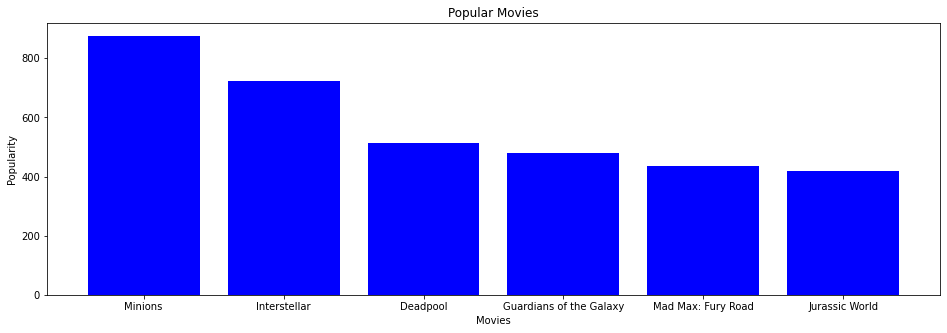

In [ ]:
pop = df1.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.bar(pop['title'].head(6),pop['popularity'].head(6), align='center',color='blue')
plt.xlabel('Movies')
plt.ylabel("Popularity")
plt.title("Popular Movies")

In [ ]:
features = ['keywords','cast','genres','director']

In [ ]:
for feature in features:
  df[feature] = df[feature].fillna('')

In [ ]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

In [ ]:
df["combined_features"] = df.apply(combine_features,axis=1) 
print(df['combined_features'].head(10))

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
5    dual identity amnesia sandstorm love of one's ...
6    hostage magic horse fairy tale musical Zachary...
7    marvel comic sequel superhero based on comic b...
8    witch magic broom school of witchcraft wizardr...
9    dc comics vigilante superhero based on comic b...
Name: combined_features, dtype: object


In [ ]:
cv = CountVectorizer() #count the no of text
count = cv.fit_transform(df["combined_features"]) # combined strings(movie contents) to CountVectorizer() object

In [ ]:
cosine_sim = cosine_similarity(count)
print (cosine_sim)

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]


In [ ]:
cosine_sim.shape

(4803, 4803)

In [ ]:
movie_user_likes = input("Enter movie name-").upper()
print('You Selected-'+movie_user_likes)

Enter movie name-deadpool
You Selected-DEADPOOL


In [ ]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.real_title == title]["index"].values[0]

In [ ]:
try:
  df_index = get_index_from_title(movie_user_likes)
  similar_movies = list(enumerate(cosine_sim[df_index])) #(movie_id,similarity)
  sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1],reverse=True)[1:] #(sorting similar movies)
  print(sorted_similar_movies)
  i=0
  print("Top 5 similar movies to "+movie_user_likes+" are:\n")
  for element in sorted_similar_movies:
    print(i+1, get_title_from_index(element[0]))
    i=i+1
    if i>=5:
      break
except:
  print("Sorry We Dont have this movie In out dataset")

[(174, 0.4276686017238498), (182, 0.4000661320993193), (511, 0.4000661320993193), (79, 0.39285714285714274), (126, 0.39285714285714274), (203, 0.39285714285714274), (7, 0.3795360576382948), (16, 0.37336432831617183), (38, 0.3706246583305506), (33, 0.35714285714285704), (46, 0.35093120317179816), (64, 0.3335621924974955), (9, 0.30860669992418377), (1192, 0.3054799049859588), (782, 0.29095718698132317), (14, 0.28571428571428564), (241, 0.28571428571428564), (870, 0.28571428571428564), (4759, 0.28347335475692037), (122, 0.27583864218368526), (254, 0.27153769332085226), (88, 0.2594372608313854), (700, 0.25458753860865774), (1177, 0.24854790640048), (1077, 0.24743582965269675), (85, 0.24174688920761403), (101, 0.24174688920761403), (313, 0.2364331218717302), (1445, 0.2364331218717302), (1024, 0.2338535866733713), (31, 0.2267786838055363), (68, 0.2267786838055363), (41, 0.22237479499833035), (668, 0.22237479499833035), (4440, 0.2182178902359924), (163, 0.21428571428571425), (26, 0.2142857142